In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
tf.test.is_built_with_cuda()

False

In [5]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 26s 0us/step


In [6]:
X_train.shape

(50000, 32, 32, 3)

In [8]:
X_train[0].shape

(32, 32, 3)

In [9]:
def plot_sample(index):
    plt.figure(figsize=(10,1))
    plt.imshow(X_train[index])

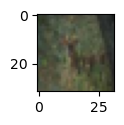

In [12]:
plot_sample(10)

In [14]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [18]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10
)

In [19]:
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [20]:
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10
)

In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
model.fit(X_train_scaled, y_train_categorical, epochs=2)

Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.4795 - loss: 1.4826
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.4917 - loss: 1.4324


In [31]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [32]:
model.predict(X_test_scaled)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([[0.4182939 , 0.76113117, 0.6807869 , ..., 0.06878714, 0.5967324 ,
        0.18713325],
       [0.9127298 , 0.9776679 , 0.36022985, ..., 0.12514485, 0.9666736 ,
        0.98662996],
       [0.9690919 , 0.93699574, 0.4200599 , ..., 0.28129867, 0.9739082 ,
        0.92492735],
       ...,
       [0.13318785, 0.09899623, 0.8143952 , ..., 0.57965726, 0.36545452,
        0.12990315],
       [0.53993773, 0.4747126 , 0.7035964 , ..., 0.43974626, 0.11035348,
        0.37360463],
       [0.59490144, 0.36372474, 0.73486173, ..., 0.9199311 , 0.21911496,
        0.52268714]], dtype=float32)

In [33]:
classes[y_test[0][0]]

'cat'

In [35]:
np.argmax(model.predict(X_test_scaled)[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


9

In [37]:
model.evaluate(X_test_scaled, y_test_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4880 - loss: 1.4720


[1.4754104614257812, 0.48429998755455017]

In [38]:
def get_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32, 32, 3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')
    ])

    model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    
    return model

In [39]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.3064 - loss: 1.9274
17.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [40]:
with tf.device('/GPU:0'):
    gpu_model = get_model()
    gpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.3092 - loss: 1.9280
